![title](photos/title.jpg)


## Project Overview
This project focuses on predicting robbery rates within U.S. municipalities as an indicator of economic distress. By understanding and anticipating financial strain in communities, the study aims to guide resource allocation and interventions to support economic stability.

## Background
- **Municipal Economic Health:** Economic growth in towns and cities is essential for the well-being of residents. Expanding infrastructure, information technology, and e-commerce have created opportunities for municipalities to flourish.
- **Case Study - Detroit:** Detroit’s economic decline, following the deindustrialization and relocation of major automobile manufacturers, exemplifies how economic downturns can lead to increased violent crime and population outflow.

## Problem Statement
Robbery rates can reflect economic strain in municipalities. By predicting robbery trends, we can identify communities facing financial distress and address root causes through targeted policies and resources.

## Hypothesis
Higher robbery rates are associated with economic hardship in communities. Predicting these rates can enable proactive interventions, which may help reduce economic-driven crime and improve residents' quality of life.

## Objectives
- **Predict Robbery Rates:** Track trends and identify factors contributing to elevated robbery rates in municipalities.
- **Guide Policy and Interventions:** Use robbery rate predictions to inform policymakers, enabling targeted support for economically distressed areas.

## Data-Driven Policy Implications
- **Households with Investment/Rent Income:** Data indicates  stronga negative correlation between robbery rates and the percentage of households with investment or rent income. This suggests that communities with higher proportions of investment income may experience lower robbery rates, potentially due to increased financial stability. Policies that promote investment opportunities and economic security could help reinforce these protective effects against financial stress and related crimes.

- **Households with Public Assistance Income:** The percentage of households receiving public assistance correlates positively with higher robbery rates, highlighting the impact of financial vulnerability on crime rates. By increasing access to financial resources, job training programs, and assistance tailored to economic resilience, policymakers may help alleviate some of the financial stressors contributing to robbery rates
es


## Key Takeaway
Robbery rates serve as a key metric for identifying economically distressed communities. Accurate predictions can support data-driven resource allocation, helping to foster resilient communities and improve residents’ quality of life.


# Introduction

In [9]:
import studio3
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from studio3 import boxplot, colToNumeric, removeOutliersIQR, plot_quantitative_data, additiveOLS
from studio3 import plotCorrelationMatrices, crossValidationLR, evaluateModels, crossValidationDT
from studio3 import crossValidationRF, crossValidationXGB, scatterVsTarget, plotResiduals

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
df = pd.read_csv('datasets/crimedata2.csv')

In [11]:
df.shape

(2215, 147)

In [12]:
df.head(3)

,Ecommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0,0.0,0,0,1,8.2,4,32.81,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0,0.0,1,4.25,5,21.26,24,102.05,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?

![preprocessing](photos/preprocessing.jpg)

# Functions

In [15]:
df.replace('?', np.nan, inplace=True)

In [16]:
objects = df.dtypes[df.dtypes == 'object']
objects

Ecommunityname          object
state                   object
countyCode              object
communityCode           object
OtherPerCap             object
LemasSwornFT            object
LemasSwFTPerPop         object
LemasSwFTFieldOps       object
LemasSwFTFieldPerPop    object
LemasTotalReq           object
LemasTotReqPerPop       object
PolicReqPerOffic        object
PolicPerPop             object
RacialMatchCommPol      object
PctPolicWhite           object
PctPolicBlack           object
PctPolicHisp            object
PctPolicAsian           object
PctPolicMinor           object
OfficAssgnDrugUnits     object
NumKindsDrugsSeiz       object
PolicAveOTWorked        object
PolicCars               object
PolicOperBudg           object
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
PolicBudgPerPop         object
rapes                   object
rapesPerPop             object
robberies               object
robbbPerPop             object
assaults                object
assaultP

In [17]:
for col in df.columns:
    if df[col].dtype == 'object': df[col] = colToNumeric(df[col])

In [18]:
df.dtypes

Ecommunityname            object
state                     object
countyCode               float64
communityCode            float64
fold                       int64
population                 int64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                  int64
pctUrban                 float64
medIncome                  int64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                  int64
perCapInc                  int64
whitePerCap                int64
blackPerCap                int64
indianPerCap               int64
AsianPerCap                int64
OtherPerCa

In [19]:
results = df.isna().sum()
results[results > 0]

countyCode              1221
communityCode           1224
OtherPerCap                1
LemasSwornFT            1872
LemasSwFTPerPop         1872
LemasSwFTFieldOps       1872
LemasSwFTFieldPerPop    1872
LemasTotalReq           1872
LemasTotReqPerPop       1872
PolicReqPerOffic        1872
PolicPerPop             1872
RacialMatchCommPol      1872
PctPolicWhite           1872
PctPolicBlack           1872
PctPolicHisp            1872
PctPolicAsian           1872
PctPolicMinor           1872
OfficAssgnDrugUnits     1872
NumKindsDrugsSeiz       1872
PolicAveOTWorked        1872
PolicCars               1872
PolicOperBudg           1872
LemasPctPolicOnPatr     1872
LemasGangUnitDeploy     1872
PolicBudgPerPop         1872
rapes                    208
rapesPerPop              208
robberies                  1
robbbPerPop                1
assaults                  13
assaultPerPop             13
burglaries                 3
burglPerPop                3
larcenies                  3
larcPerPop    

In [20]:
df = df[df['robbbPerPop'].notna()]

In [21]:
df['robbbPerPop'].describe()

count    2214.000000
mean      162.612597
std       234.486624
min         0.000000
25%        27.647500
50%        74.800000
75%       187.155000
max      2264.130000
Name: robbbPerPop, dtype: float64

In [22]:
df[df['robbbPerPop'] == 0][['robbbPerPop', 'assaultPerPop']]

,robbbPerPop,assaultPerPop
14,0.0,65.82
23,0.0,137.13
33,0.0,16.72
82,0.0,835.73
117,0.0,60.90
119,0.0,195.90
144,0.0,83.64
148,0.0,46.52
178,0.0,14.46
217,0.0,75.72


In [23]:
df.drop(df[df['robbbPerPop'] == 0].index, inplace=True)

In [24]:
df[['robbbPerPop']].head()

,robbbPerPop
0,8.20
1,21.26
2,154.95
3,57.86
4,32.04


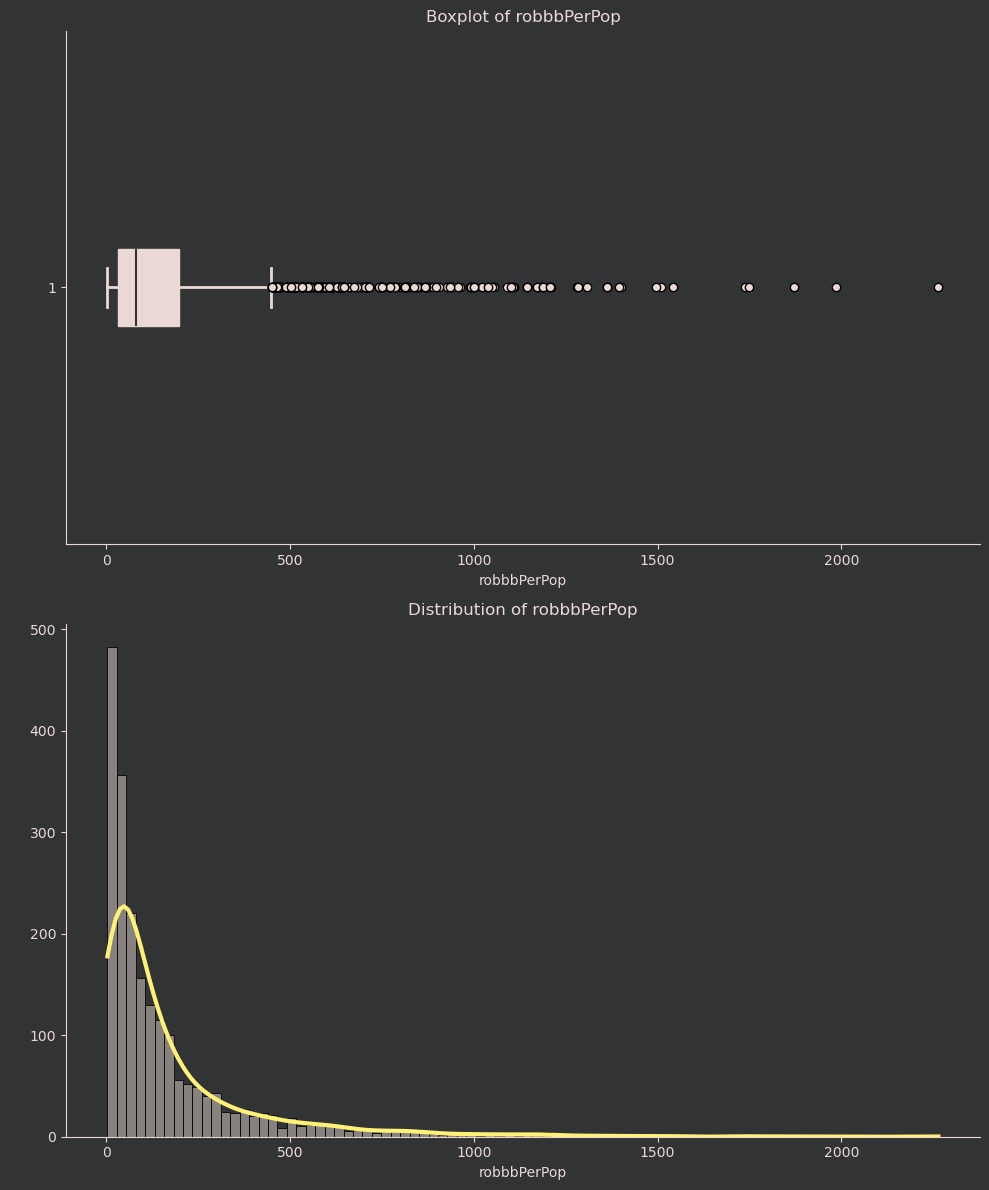

In [25]:
boxplot(df, 'robbbPerPop')

In [26]:
# removie outliers for robberies per population
df = removeOutliersIQR(df, 'robbbPerPop')

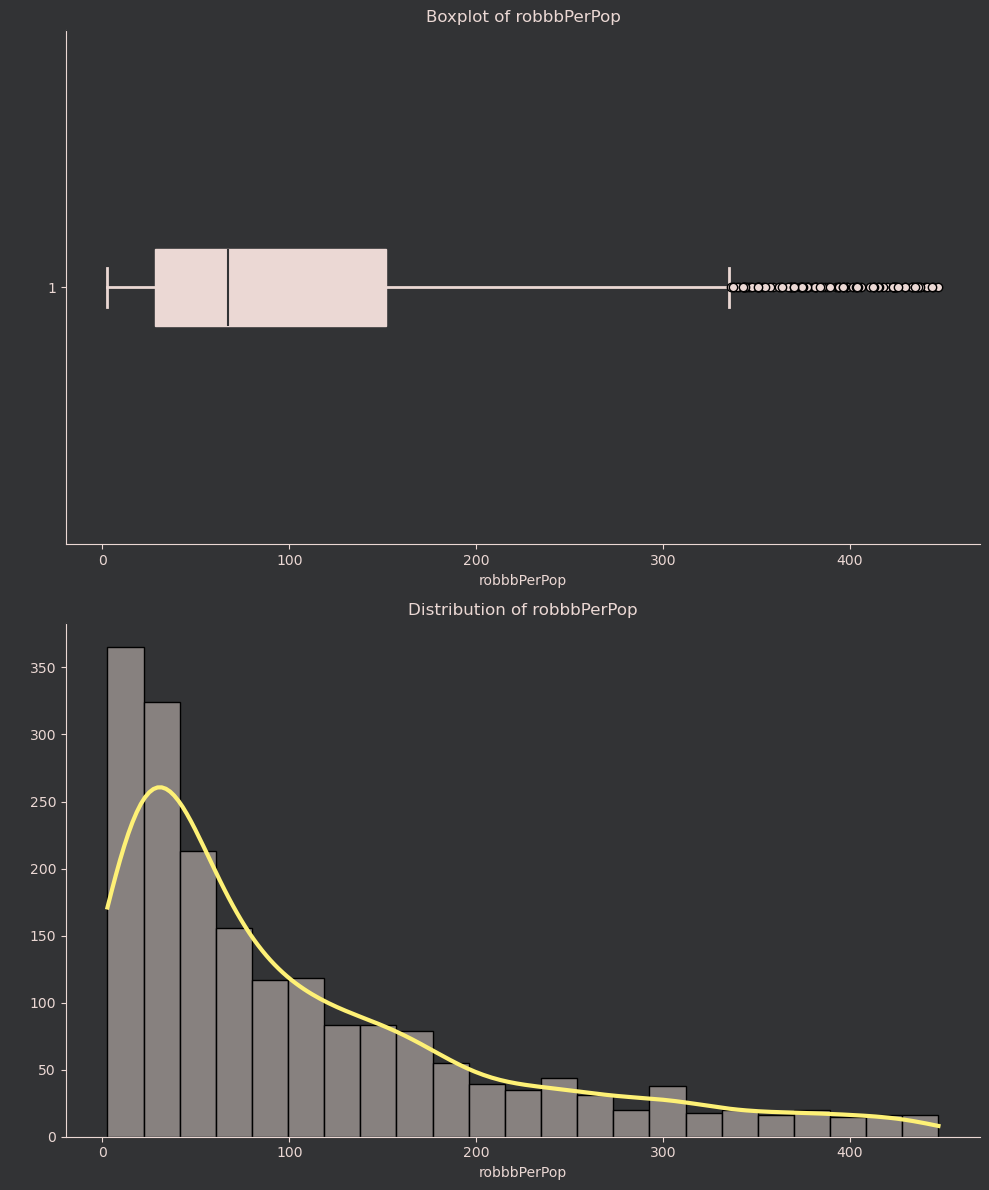

In [27]:
boxplot(df, 'robbbPerPop')

In [28]:
df[['robbbPerPop']].head()

,robbbPerPop
0,8.20
1,21.26
2,154.95
3,57.86
4,32.04


In [29]:
df['robbbPerPop'].isna().sum()

0

## Import Variable Classifications

In [31]:
# load a csv with a rudimentary classification of variables to begin narrowing process
variables = pd.read_csv('datasets/variables.csv')
variables.head(3)

,Variable,Type,Description,Social Indicator,Financial Indicator,Neither,Indicator Type
0,state,nominal,US state (by number),False,False,True,Neither
1,county,numeric,numeric code for county,False,False,True,Neither
2,community,numeric,numeric code for community,False,False,True,Neither


In [32]:
variables_df = variables[variables['Indicator Type'] == 'Financial']
variables_df.shape

(32, 7)

In [33]:
# Get the list of column names from variables.csv
column_names = variables_df.iloc[:, 0].tolist()

# Filter out df columns
column_names = [col for col in column_names if col in df.columns]
filtered_df = df[column_names].copy()
filtered_df['robbbPerPop'] = df['robbbPerPop']
filtered_df.shape

(1921, 33)

In [34]:
# Rename df for simplicity
df = filtered_df
df.head()

,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PctHousOwnOcc,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,PolicOperBudg,PolicBudgPerPop,robbbPerPop
0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,14.65,28.82,5.49,50.73,91.01,215900,262600,326900,685,1001,1001,1001,23.8,21.1,14.0,NaN,NaN,8.20
1,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,12.26,29.28,6.39,37.64,84.88,136300,164200,199900,467,560,672,627,27.6,20.7,12.5,NaN,NaN,21.26
2,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,15.95,21.52,8.79,32.48,57.79,74700,90400,112000,370,428,520,484,24.1,21.7,11.6,NaN,NaN,154.95
3,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,31.22,27.43,26.76,22.71,54.89,36400,49600,66500,195,250,309,333,28.7,20.6,14.5,NaN,NaN,57.86
4,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,6.89,36.54,10.94,27.80,53.57,30600,43200,59500,202,283,362,332,32.2,23.2,12.9,NaN,NaN,32.04


In [35]:
# Evaluate columns with null entries
df.isna().sum()

medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  0
PctEmplManu                 0
PctEmplProfServ             0
PctOccupManu                0
PctOccupMgmtProf            0
PctHousOwnOcc               0
OwnOccLowQuart              0
OwnOccMedVal                0
OwnOccHiQuart               0
RentLowQ                    0
RentMedian                  0
RentHighQ                   0
MedRent                     0
MedRentPctHousInc           0
MedOwnCostPctInc            0
MedOwnCostPctIncNoMtg       0
PolicOperBudg            1699
PolicBudgPerPop          1699
robbbPerPop                 0
dtype: int

In [36]:
# Eliminate the entry with a null value in 'OtherPerCap'
df = df.dropna(subset=['OtherPerCap'])
               
# Subset the DataFrame to include only columns without nulls
df = df[df.columns[df.notna().all()]]

In [37]:
df.columns

Index(['medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu',
       'PctOccupMgmtProf', 'PctHousOwnOcc', 'OwnOccLowQuart', 'OwnOccMedVal',
       'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent',
       'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg',
       'robbbPerPop'],
      dtype='object')

In [38]:
df.shape

(1920, 31)

![exploratory](photos/exploratory.jpg)

# Quantitative Variable Distributions

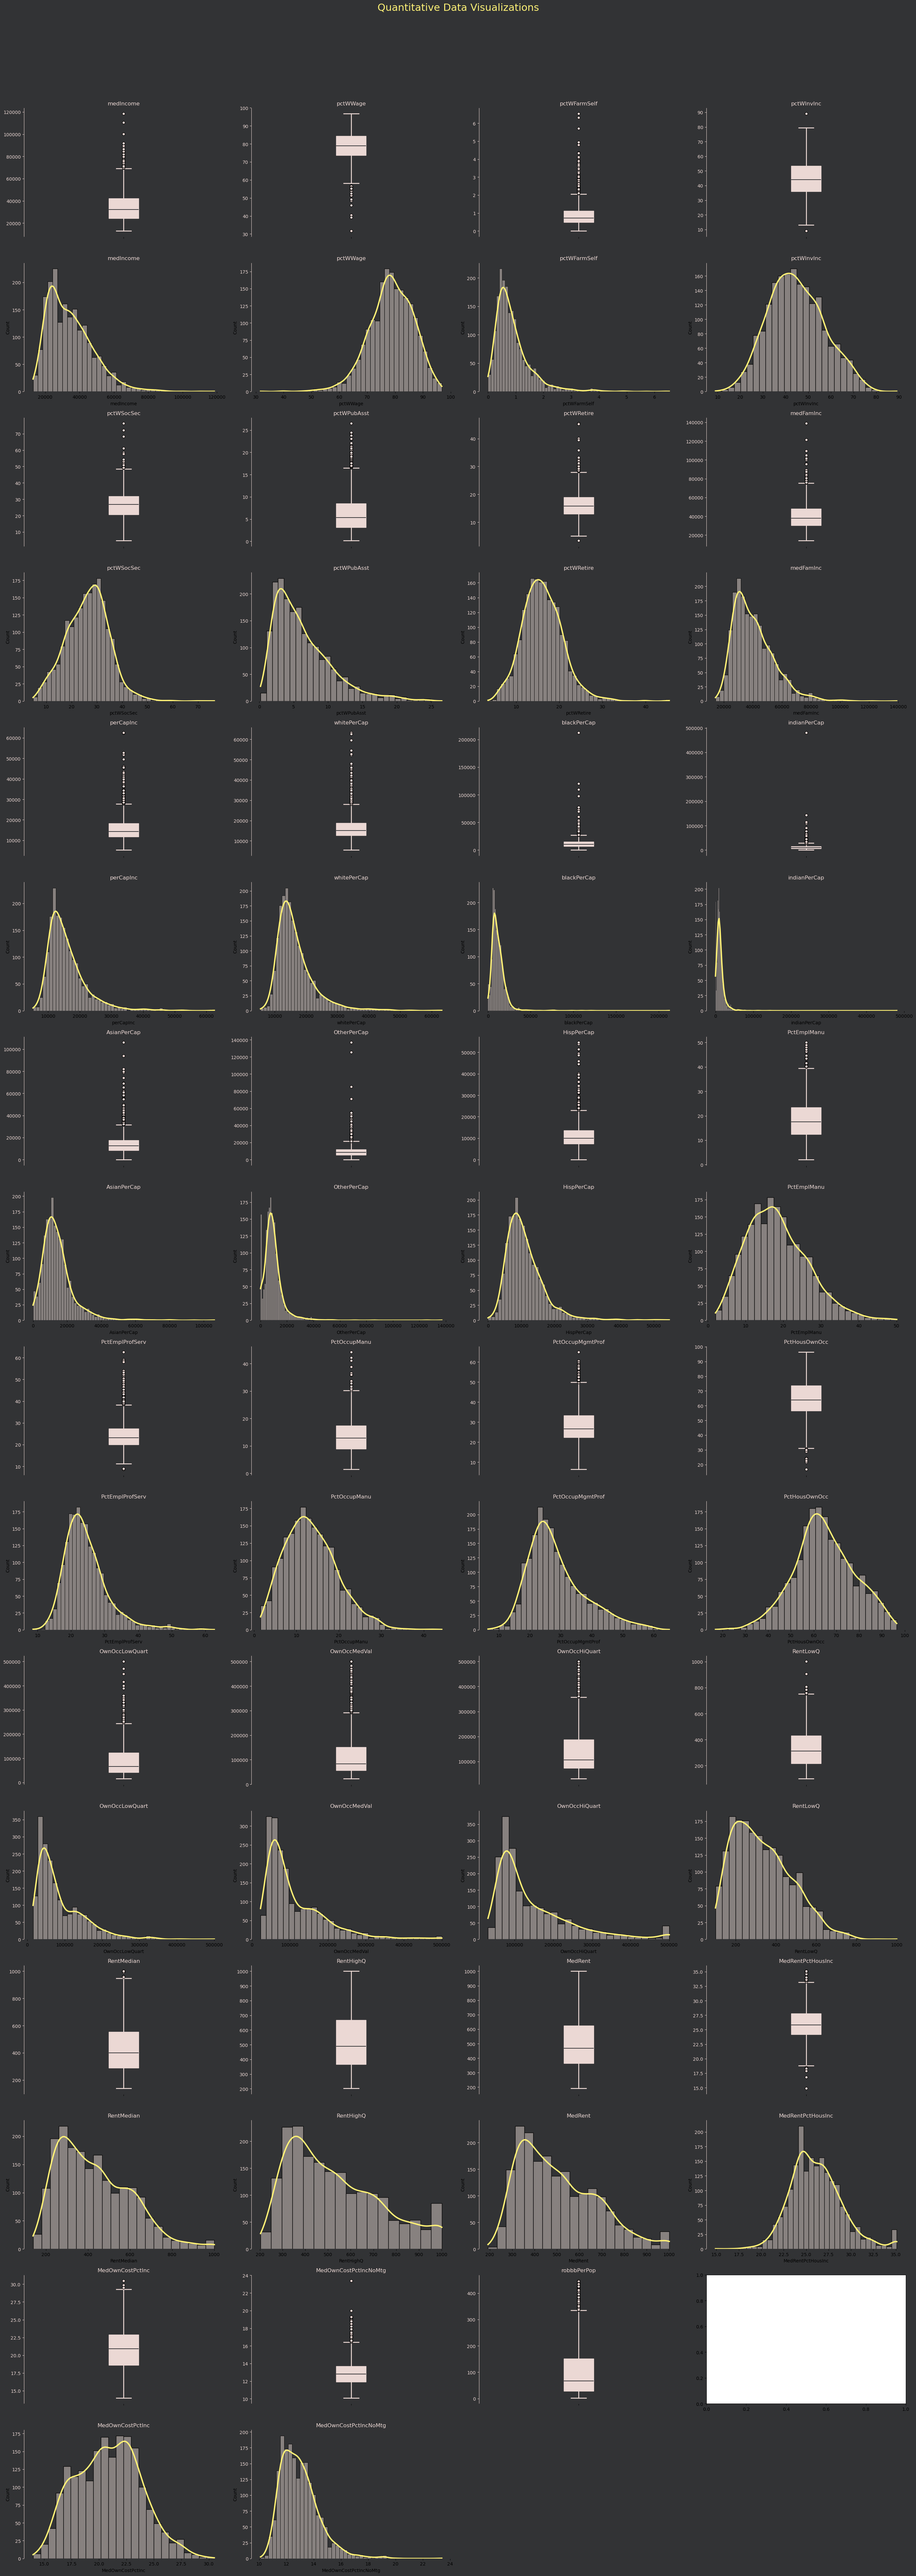

In [41]:
plot_quantitative_data(df, df.columns)

In [42]:
#Identify numeric columns
columns = df.select_dtypes(include=['number']).columns.tolist()

# Calculate correlations with 'strain_score_std'
corr = df[columns].corr()['robbbPerPop']

# Order by absolute value of correlations
corr_abs = corr.abs().sort_values(ascending=False)

# Create a list with variable name ordered by absolute correlation
correlation_list = [(col, corr[col]) for col in corr_abs.index]
correlation_list = pd.DataFrame(correlation_list, columns=['Variable', 'Correlation'])

In [43]:
# Merge variables with corelation_list 
variables = pd.merge(variables, correlation_list, on='Variable')

# Create a columns with the absolute value of the correlation
variables['abs_correlation'] = variables['Correlation'].abs()

# Sort variables df by absolute value of the correlation
variables = variables.sort_values(by='abs_correlation', ascending=False)

In [44]:
variables[['Variable', 'Correlation', 'abs_correlation']]

,Variable,Correlation,abs_correlation
3,pctWInvInc,-0.421441,0.421441
5,pctWPubAsst,0.412266,0.412266
19,PctHousOwnOcc,-0.389309,0.389309
7,medFamInc,-0.290805,0.290805
0,medIncome,-0.284730,0.284730
27,MedRentPctHousInc,0.261250,0.261250
18,PctOccupMgmtProf,-0.238019,0.238019
17,PctOccupManu,0.217991,0.217991
8,perCapInc,-0.213726,0.213726
2,pctWFarmSelf,-0.209052,0.209052


In [45]:
model = additiveOLS(df, 'robbbPerPop', .001)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            robbbPerPop   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     122.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.19e-265
Time:                        22:00:48   Log-Likelihood:                -10980.
No. Observations:                1920   AIC:                         2.199e+04
Df Residuals:                    1904   BIC:                         2.208e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -34.52

In [46]:
variables_of_interest = model.model.exog_names
variables_of_interest

variables_of_interest = ['robbbPerPop'] + variables_of_interest[1:]
df = df[variables_of_interest]
df.shape

(1920, 16)

In [47]:
while True:
    shape = df.shape
    for col in df.columns: df = removeOutliersIQR(df, col)
    if shape == df.shape: break
df.shape

(1151, 16)

In [48]:
model = additiveOLS(df, 'robbbPerPop', .003)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            robbbPerPop   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     94.33
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          3.05e-131
Time:                        22:00:49   Log-Likelihood:                -6042.6
No. Observations:                1151   AIC:                         1.211e+04
Df Residuals:                    1141   BIC:                         1.216e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             81.1719     16.734      4.

In [49]:
variables_of_interest = model.model.exog_names
variables_of_interest

variables_of_interest = ['robbbPerPop'] + variables_of_interest[1:]
df = df[variables_of_interest]
df.shape

(1151, 10)

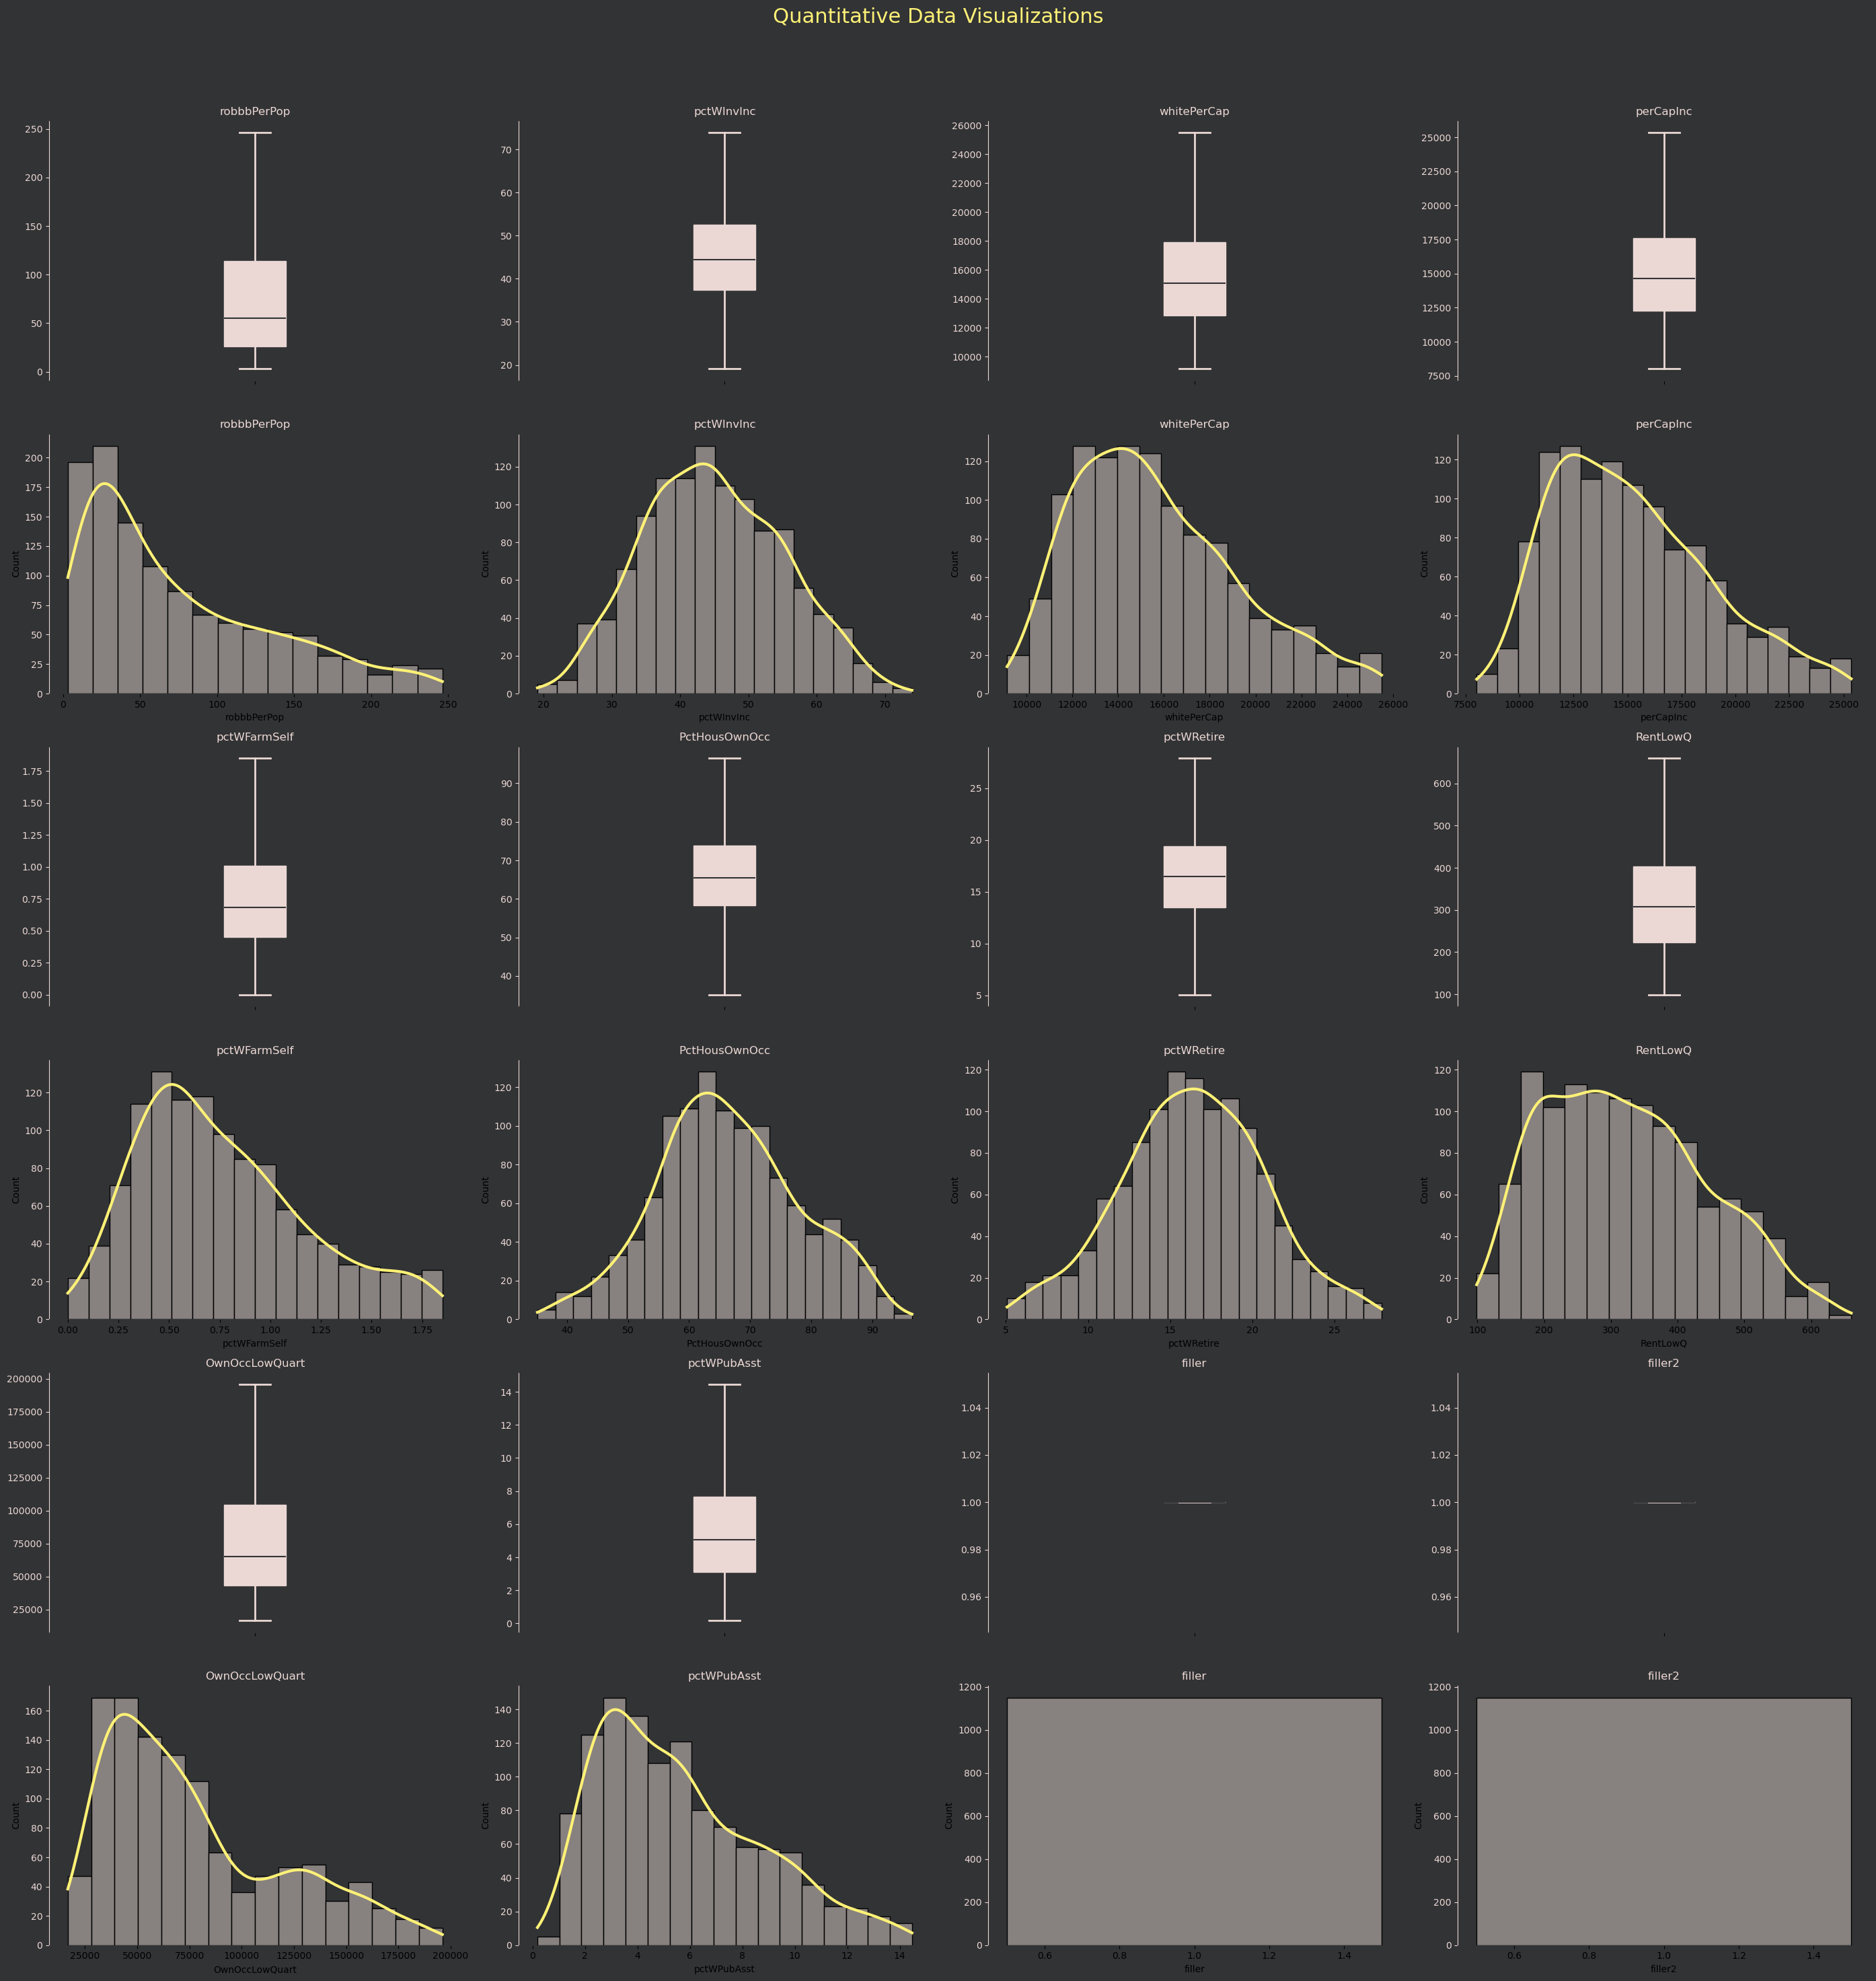

In [50]:
df['filler'] = 1
df['filler2'] = 1
plot_quantitative_data(df, df.columns)

In [51]:
df = df.drop(columns=['filler', 'filler2'], axis=1)

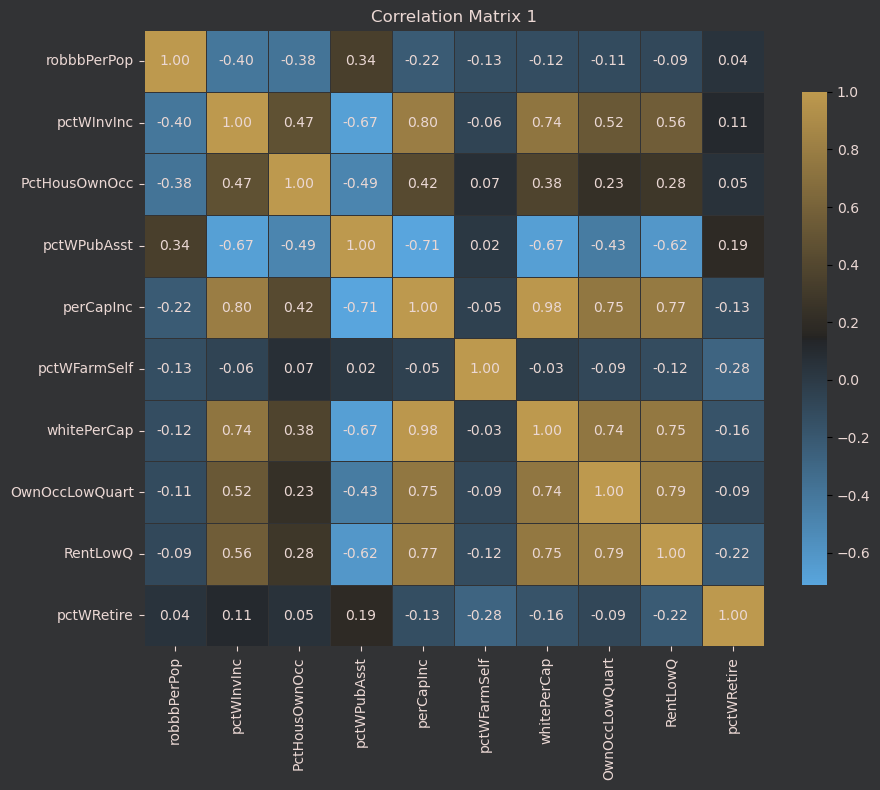

In [52]:
plotCorrelationMatrices(df, 'robbbPerPop')

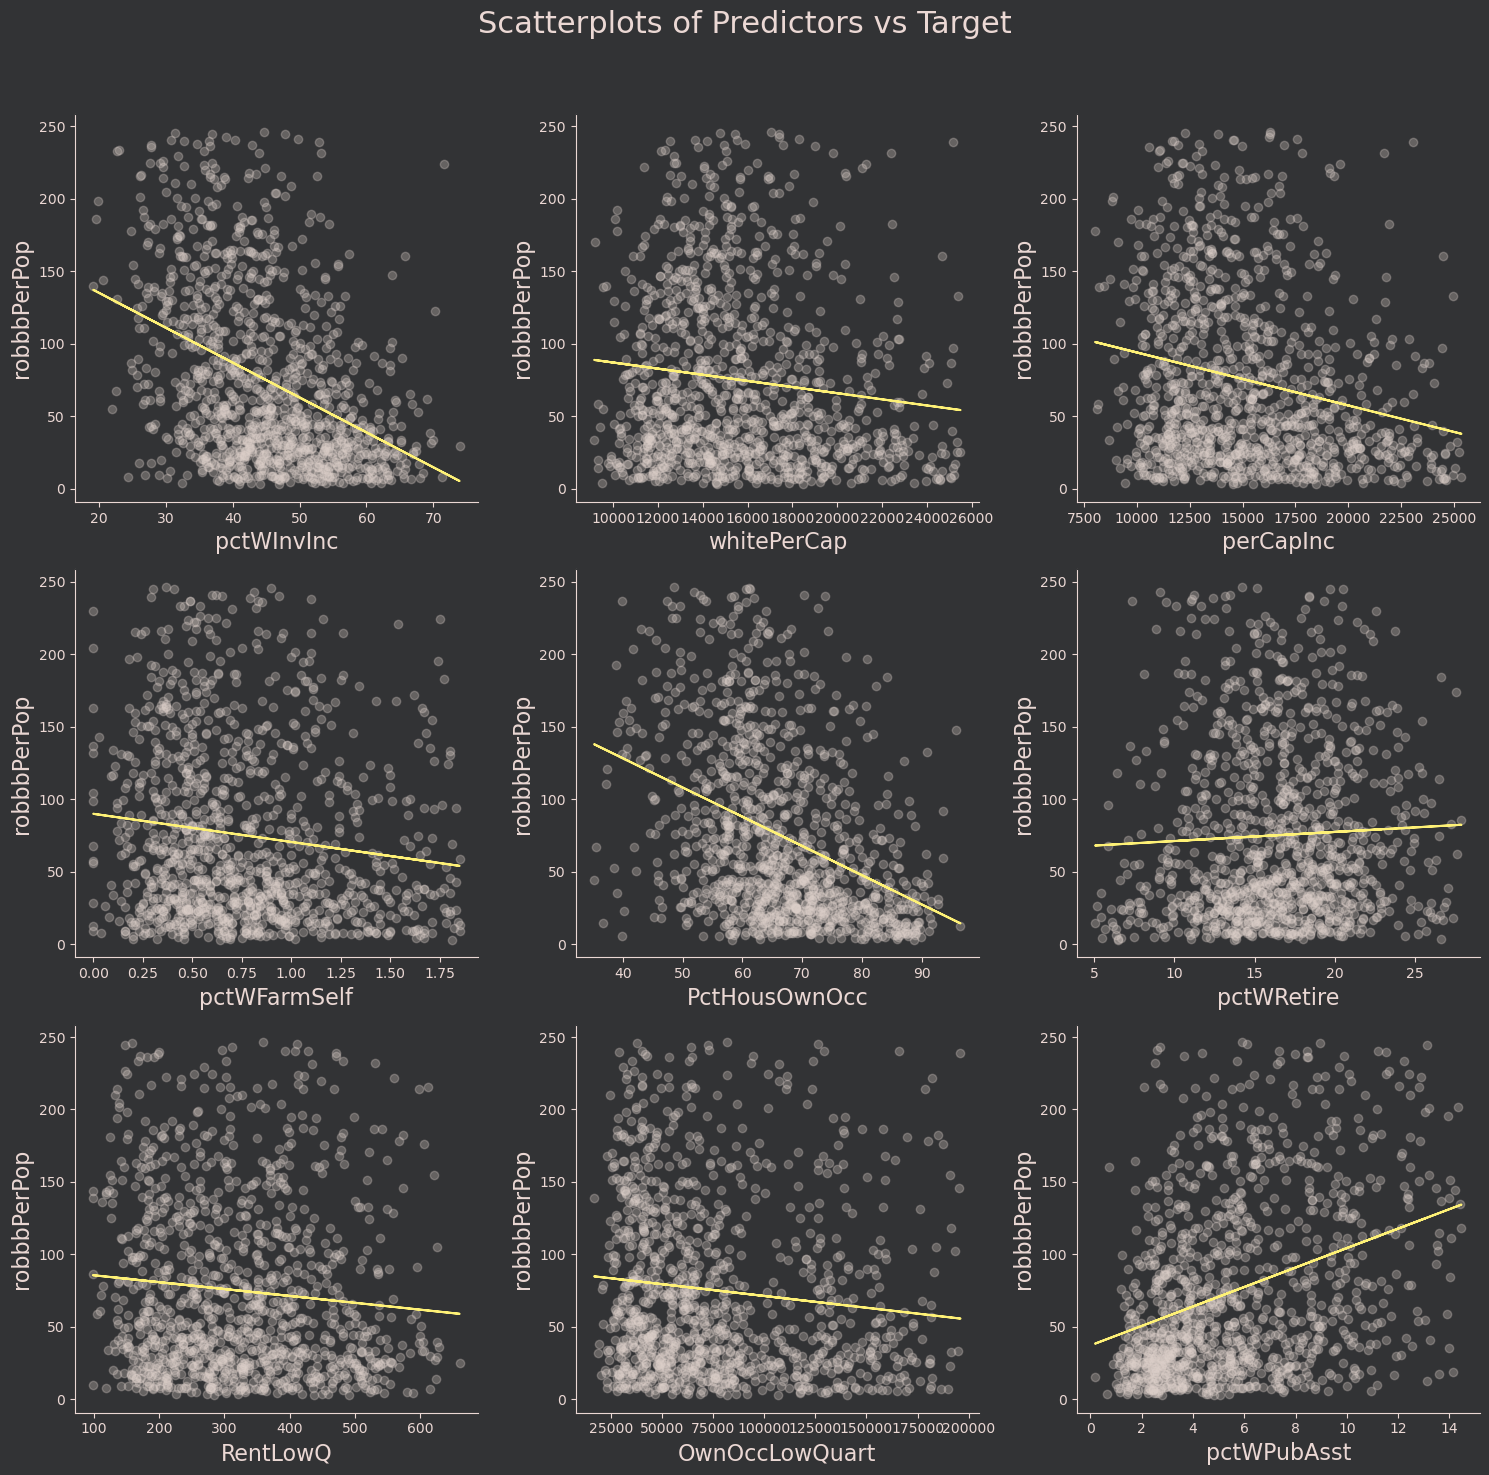

In [53]:
scatterVsTarget(df, df['robbbPerPop'], nrows=3)

In [54]:
max_values = df.max().to_dict()
min_values = df.min().to_dict()

In [55]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

![modeling](photos/modeling.jpg)

# Baseline Model

In [58]:
robb_mean = df['robbbPerPop'].mean()
baseline_df = df[['robbbPerPop', 'pctWRetire']]

In [59]:
baseline_df = baseline_df.copy()
baseline_df.loc[:, 'pctWRetire'] = robb_mean
baseline_df.rename(columns={'pctWRetire': 'baseline_pred'}, inplace=True)

In [60]:
baseline_df['residuals'] = baseline_df['robbbPerPop'] - baseline_df['baseline_pred']
baseline_df.head()

,robbbPerPop,baseline_pred,residuals
0,0.075191,0.296236,-0.221045
1,0.624497,0.296236,0.328261
2,0.225573,0.296236,-0.070663
3,0.357835,0.296236,0.061599
4,0.112910,0.296236,-0.183326


In [61]:
squared_residuals = baseline_df['residuals'] ** 2
baseline_mse = squared_residuals.mean()

baseline_rmse = np.sqrt(baseline_mse)

absolute_residuals = baseline_df['residuals'].abs()
baseline_mae = absolute_residuals.mean()

In [62]:
print(baseline_mse)
print(baseline_rmse)
print(baseline_mae)

0.06258659900847191
0.25017313806336583
0.2068079631711672


# Multiple Linear Regression

In [64]:
X = df.drop(columns='robbbPerPop', axis=1)
y = df['robbbPerPop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [65]:
lm_avg, lms = crossValidationLR(X_train, y_train)

                                  OLS Cross-Validation Averaging                                  
Num Folds:                                                                                         5
Dep. Variable:                                                                           robbbPerPop
Model:                                                                                           OLS
Method:                                                                                Least Squares
Date:                                                                               Wed, 06 Nov 2024
Time:                                                                                       22:01:09
                                                                                     mean        std
----------------------------------------------------------------------------------------------------
                                                              R-squared             0.432    

In [66]:
lms['lm_avg'] = lm_avg
X_test = sm.add_constant(X_test)

In [67]:
lr_metrics = evaluateModels(lms, X_test, y_test)

In [68]:
#

lr_metrics

,R-squared,MSE,RMSE,MAE
Models,,,,
lm1,0.404554,0.033939,0.184227,0.137696
lm2,0.403419,0.034004,0.184402,0.137646
lm3,0.406104,0.033851,0.183987,0.137340
lm4,0.399852,0.034207,0.184953,0.138428
lm5,0.398327,0.034294,0.185187,0.138274
lm_avg,0.404554,0.033939,0.184227,0.137696


# Decision Trees

In [70]:
X_test = X_test.drop(columns='const', axis=1)

In [71]:
c_1 = crossValidationDT(X_train, y_train, n_jobs=4)

In [72]:
c_5 = crossValidationDT(X_train, y_train, criterion='absolute_error', n_jobs=4)

In [73]:
c_1_metrics = evaluateModels(c_1, X_test, y_test)
c_1_metrics

,R-squared,MSE,RMSE,MAE
Models,,,,
dt1,0.095752,0.051541,0.227026,0.165833
dt2,0.123522,0.049958,0.223513,0.164537
dt3,0.181485,0.046654,0.215995,0.165050
dt4,0.079498,0.052467,0.229057,0.166727
dt5,0.154043,0.048218,0.219586,0.163354


In [74]:
c_5_metrics = evaluateModels(c_5, X_test, y_test)
c_5_metrics

,R-squared,MSE,RMSE,MAE
Models,,,,
dt1,-0.057628,0.060283,0.245526,0.176651
dt2,-0.021775,0.058239,0.241329,0.177331
dt3,-0.046581,0.059653,0.244240,0.179814
dt4,-0.130732,0.064450,0.253870,0.187449
dt5,0.035454,0.054978,0.234473,0.170486


# Random Forest

In [76]:
rfs = crossValidationRF(X_train, y_train, n_jobs=4)

In [77]:
rf_metrics = evaluateModels(rfs, X_test, y_test)
rf_metrics

,R-squared,MSE,RMSE,MAE
Models,,,,
rf1,0.286428,0.040672,0.201674,0.152322
rf2,0.286655,0.040659,0.201642,0.149906
rf3,0.304388,0.039649,0.199120,0.151358
rf4,0.295354,0.040164,0.200409,0.148997
rf5,0.323609,0.038553,0.196350,0.149101


# XGBoost

In [79]:
xgs = crossValidationXGB(X_train, y_train, n_jobs=4)

In [80]:
xg_metrics = evaluateModels(xgs, X_test, y_test)
xg_metrics

,R-squared,MSE,RMSE,MAE
Models,,,,
xgb1,0.341941,0.037508,0.193671,0.146465
xgb2,0.297737,0.040028,0.200070,0.150906
xgb3,0.366079,0.036132,0.190085,0.141985
xgb4,0.306315,0.039539,0.198844,0.149647
xgb5,0.337681,0.037751,0.194296,0.145642


In [81]:
c_1_metrics.index = ['c_1_' + model for model in c_1_metrics.index]
c_5_metrics.index = ['c_5_' + model for model in c_5_metrics.index]

combined_metrics = pd.concat([lr_metrics, xg_metrics, rf_metrics, c_1_metrics, c_5_metrics])

In [82]:
combined_metrics

,R-squared,MSE,RMSE,MAE
lm1,0.404554,0.033939,0.184227,0.137696
lm2,0.403419,0.034004,0.184402,0.137646
lm3,0.406104,0.033851,0.183987,0.137340
lm4,0.399852,0.034207,0.184953,0.138428
lm5,0.398327,0.034294,0.185187,0.138274
lm_avg,0.404554,0.033939,0.184227,0.137696
xgb1,0.341941,0.037508,0.193671,0.146465
xgb2,0.297737,0.040028,0.200070,0.150906
xgb3,0.366079,0.036132,0.190085,0.141985
xgb4,0.306315,0.039539,0.198844,0.149647


In [83]:
combined_metrics.sort_values(by='R-squared', ascending=False)

,R-squared,MSE,RMSE,MAE
lm3,0.406104,0.033851,0.183987,0.137340
lm1,0.404554,0.033939,0.184227,0.137696
lm_avg,0.404554,0.033939,0.184227,0.137696
lm2,0.403419,0.034004,0.184402,0.137646
lm4,0.399852,0.034207,0.184953,0.138428
lm5,0.398327,0.034294,0.185187,0.138274
xgb3,0.366079,0.036132,0.190085,0.141985
xgb1,0.341941,0.037508,0.193671,0.146465
xgb5,0.337681,0.037751,0.194296,0.145642
rf5,0.323609,0.038553,0.196350,0.149101


In [84]:
lm3 = lms['lm3']
lm3_coefs = lm3.params

feature_names = ['const'] + list(X.columns)
coefs = pd.DataFrame({'Feature': feature_names, 'Coef': lm3_coefs})

coefs

,Feature,Coef
const,const,0.477394
x1,pctWInvInc,-0.458475
x2,whitePerCap,2.568027
x3,perCapInc,-2.475539
x4,pctWFarmSelf,-0.115739
x5,PctHousOwnOcc,-0.272562
x6,pctWRetire,0.235122
x7,RentLowQ,0.311707
x8,OwnOccLowQuart,-0.151836
x9,pctWPubAsst,0.075782


In [85]:
def unnormalize_coef(feature, coef):
    if feature == 'const':
        return coef  # No scaling applied to the intercept
    range_val = max_values[feature] - min_values[feature]
    return coef * range_val

coefs['unnormalized_coef'] = coefs.apply(lambda row: unnormalize_coef(row['Feature'], row['Coef']), axis=1)

In [86]:
coefs 

,Feature,Coef,unnormalized_coef
const,const,0.477394,0.477394
x1,pctWInvInc,-0.458475,-25.142751
x2,whitePerCap,2.568027,42002.657066
x3,perCapInc,-2.475539,-42925.844660
x4,pctWFarmSelf,-0.115739,-0.214117
x5,PctHousOwnOcc,-0.272562,-16.713482
x6,pctWRetire,0.235122,5.363138
x7,RentLowQ,0.311707,174.867476
x8,OwnOccLowQuart,-0.151836,-27208.934462
x9,pctWPubAsst,0.075782,1.082931


In [87]:
max_values['whitePerCap'] - min_values['whitePerCap']

16356.0

In [88]:
models = [lms['lm3'], xgs['xgb3'], rfs['rf5']]
titles = ['LR', 'XGB', 'RF']
X_test1 = sm.add_constant(X_test)

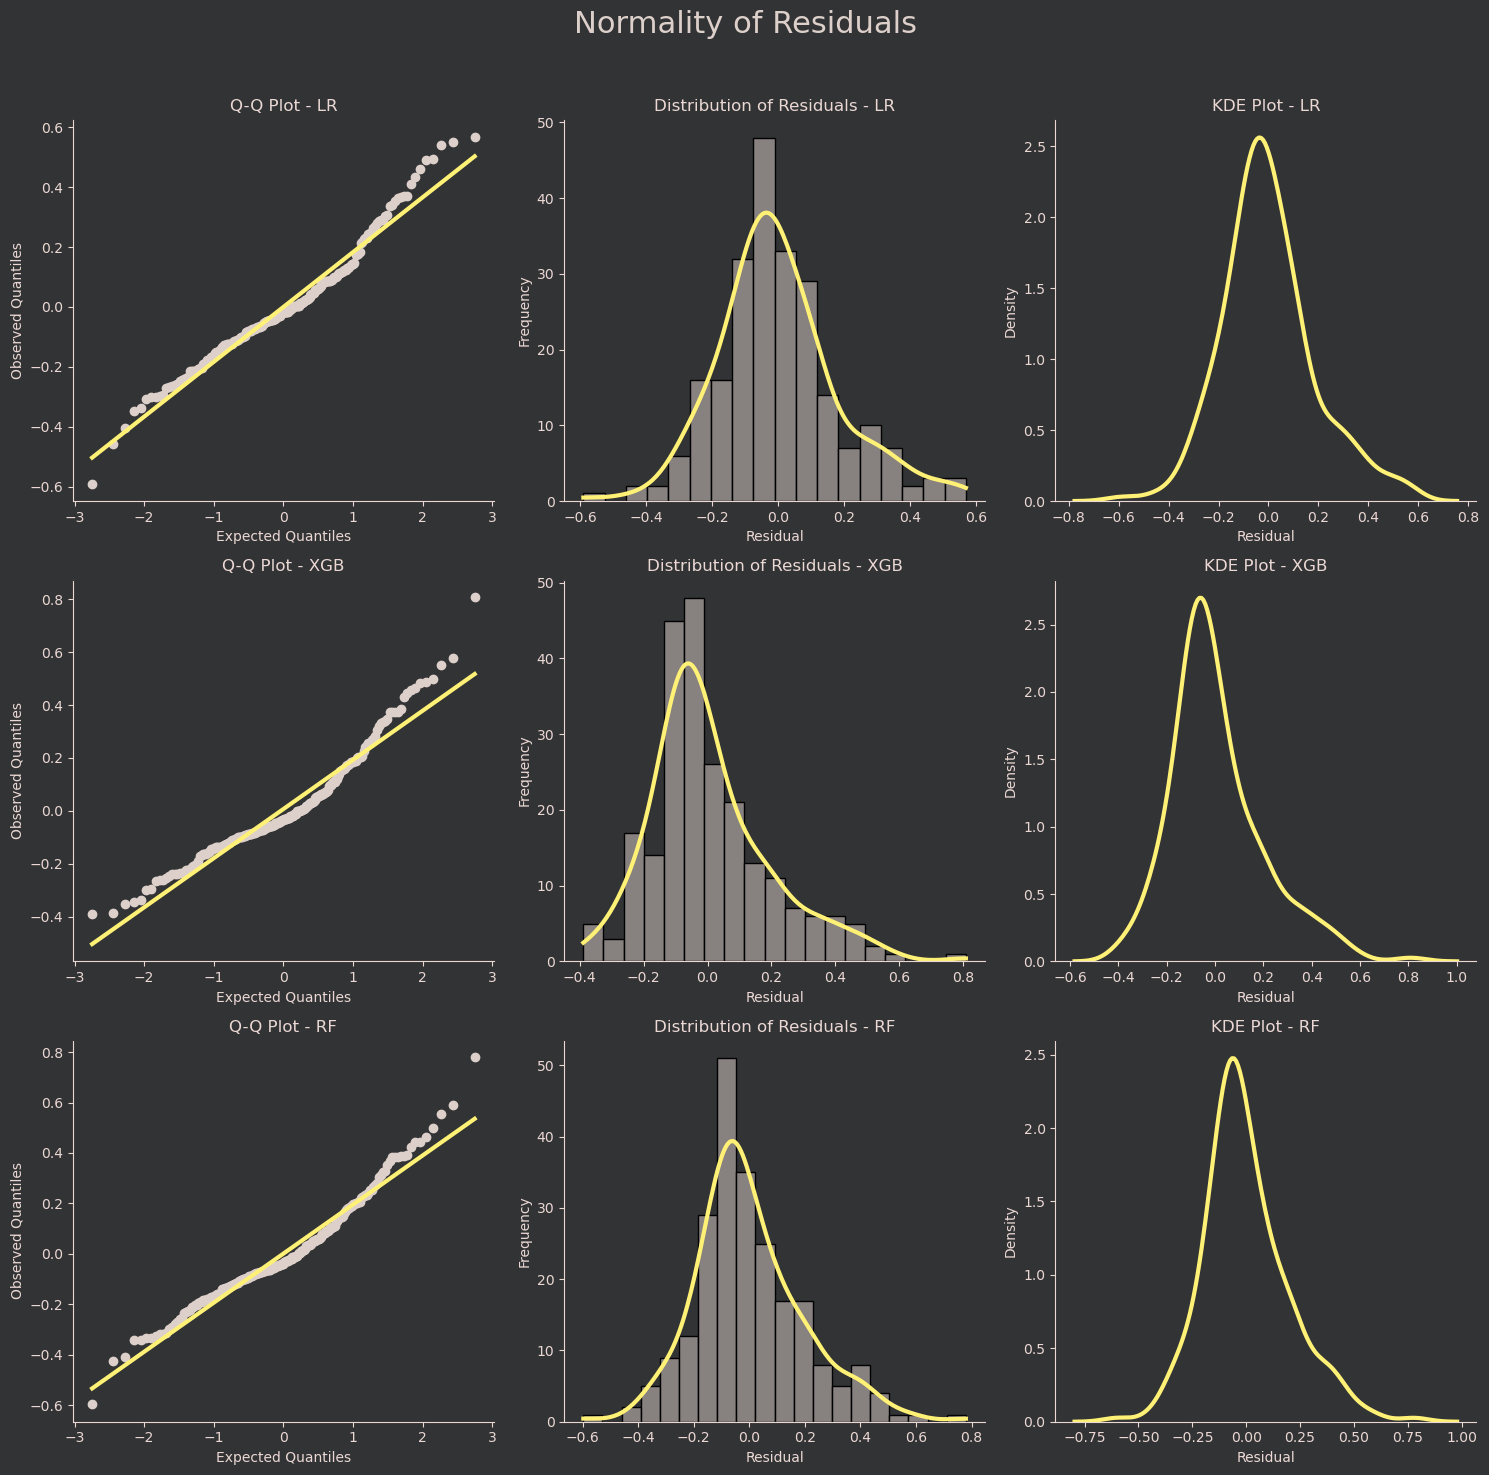

In [89]:
plotResiduals(models, X_test1, X_test, y_test, model_titles=titles)

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from IPython.display import Image
import pydotplus

tree = rfs['rf5'].estimators_[0]

# Export the tree visualization
dot_data = export_graphviz(
    tree,
    out_file=None,
    max_depth=3,  # limit to the first 3 levels
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

# Use pydotplus to create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the image
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

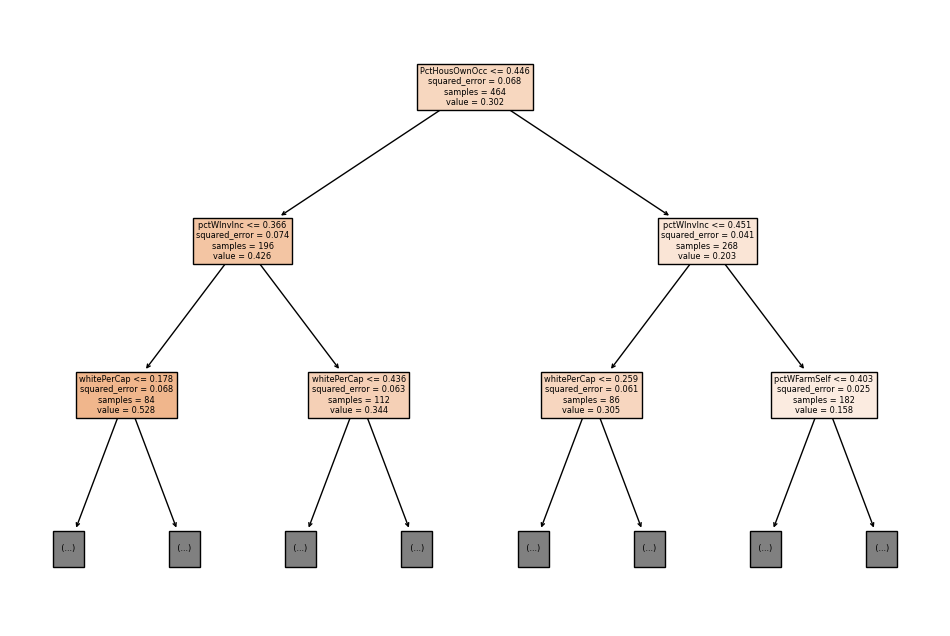

In [142]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(rfs['rf5'][0], max_depth=2, filled=True, feature_names=X_train.columns, class_names=['Class1', 'Class2'])
plt.show()